### Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading dataset

In [10]:
df = pd.read_csv("Dataset11-Weather-Data.csv")
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [12]:
df.shape

(8784, 8)

In [14]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [16]:
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


### Types of Weather

In [21]:
df.Weather.value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [25]:
df.Weather.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [27]:
df.Weather.nunique()

50

### Converting the Weather Categories into Standard Categories

In [34]:
x =  'Thunderstorms,Moderate Rain Showers,Fog'

In [36]:
list_of_lists = [w.split() for w in x.split(',')]
list_of_lists

[['Thunderstorms'], ['Moderate', 'Rain', 'Showers'], ['Fog']]

In [38]:
from itertools import chain
flat_list = list(chain(*list_of_lists))
flat_list

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [46]:
def Create_list(x):
    list_of_lists = [w.split() for w in x.split(',')]
    flat_list = list(chain(*list_of_lists))
    return flat_list


def Get_Weather(list1):
    if 'Fog' in list1 and 'Rain' in list1:
        return 'RAIN+FOG'
    elif 'Snow' in list1 and 'Rain' in list1:
        return 'SNOW+RAIN'
    elif 'Snow' in list1:
        return 'SNOW'
    elif 'Rain' in list1:
        return 'RAIN'
    elif 'Fog' in list1:
        return 'FOG'
    elif 'Clear' in list1:
        return 'CLEAR'
    elif 'Cloudy' in list1:
        return 'CLOUDY'
    else:
        return 'RAIN'

In [44]:
Create_list(x)

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [50]:
Get_Weather(Create_list(x))

'RAIN+FOG'

In [52]:
df['Std_Weather'] = df['Weather'].apply(lambda x : Get_Weather(Create_list(x)))

In [54]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,FOG
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,FOG
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",FOG
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",FOG
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,FOG


In [56]:
df.Std_Weather.value_counts()

Std_Weather
CLOUDY       3797
CLEAR        3432
RAIN          603
SNOW          556
FOG           241
RAIN+FOG      129
SNOW+RAIN      26
Name: count, dtype: int64

### Sample selection and Data balancing

In [65]:
cloudy_df = df[df['Std_Weather'] == 'CLOUDY'].sample(600)
cloudy_df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
7967,11/27/2012 23:00,-3.8,-6.5,81,7,25.0,102.07,Mostly Cloudy,CLOUDY
5033,7/28/2012 17:00,26.2,10.6,38,17,48.3,101.10,Mostly Cloudy,CLOUDY
6610,10/2/2012 10:00,15.2,13.3,88,9,24.1,101.09,Cloudy,CLOUDY
7241,10/28/2012 17:00,12.7,6.3,65,26,25.0,101.01,Cloudy,CLOUDY
2821,4/27/2012 13:00,2.7,-5.0,57,37,24.1,100.76,Cloudy,CLOUDY
...,...,...,...,...,...,...,...,...,...
6300,9/19/2012 12:00,13.2,4.0,54,22,48.3,101.37,Mostly Cloudy,CLOUDY
5412,8/13/2012 12:00,23.8,17.4,67,17,24.1,100.85,Mostly Cloudy,CLOUDY
4087,6/19/2012 7:00,19.6,14.3,71,22,24.1,101.01,Mostly Cloudy,CLOUDY
7920,11/26/2012 0:00,-4.9,-10.1,67,9,25.0,100.52,Mostly Cloudy,CLOUDY


In [67]:
clear_df = df[df['Std_Weather'] == 'CLEAR'].sample(600)
clear_df.shape

(600, 9)

### Dataset balancing

In [72]:
rain_df = df[df['Std_Weather'] == 'RAIN']
snow_df = df[df['Std_Weather'] == 'SNOW']

In [74]:
rain_df.shape

(603, 9)

In [76]:
snow_df.shape

(556, 9)

### Create new weather dataset

In [81]:
weather_df = pd.concat([cloudy_df, clear_df, rain_df, snow_df], axis = 0)
weather_df.shape

(2359, 9)

In [83]:
weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
7967,11/27/2012 23:00,-3.8,-6.5,81,7,25.0,102.07,Mostly Cloudy,CLOUDY
5033,7/28/2012 17:00,26.2,10.6,38,17,48.3,101.10,Mostly Cloudy,CLOUDY
6610,10/2/2012 10:00,15.2,13.3,88,9,24.1,101.09,Cloudy,CLOUDY
7241,10/28/2012 17:00,12.7,6.3,65,26,25.0,101.01,Cloudy,CLOUDY
2821,4/27/2012 13:00,2.7,-5.0,57,37,24.1,100.76,Cloudy,CLOUDY


In [87]:
weather_df.Std_Weather.value_counts()

Std_Weather
RAIN      603
CLOUDY    600
CLEAR     600
SNOW      556
Name: count, dtype: int64

### Drop columns Date and Weather

In [90]:
weather_df.drop(columns = ['Date/Time', 'Weather'], axis = 1, inplace = True)

In [92]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
7967,-3.8,-6.5,81,7,25.0,102.07,CLOUDY
5033,26.2,10.6,38,17,48.3,101.10,CLOUDY
6610,15.2,13.3,88,9,24.1,101.09,CLOUDY
7241,12.7,6.3,65,26,25.0,101.01,CLOUDY
2821,2.7,-5.0,57,37,24.1,100.76,CLOUDY


## Duplicate Records

In [95]:
weather_df[weather_df.duplicated()]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather


### Null/Missing values

In [100]:
weather_df.isnull().sum()

Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Std_Weather         0
dtype: int64

In [103]:
weather_df.dtypes

Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Std_Weather          object
dtype: object

### Data Visualisation

In [108]:
weather_df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,6.602671,1.614328,72.616363,16.446799,23.241882,100.815155
std,11.309453,10.505350,15.637131,9.356185,12.767063,0.923292
min,-21.400000,-26.600000,18.000000,0.000000,0.600000,97.520000
25%,-3.000000,-6.900000,62.000000,9.000000,16.100000,100.300000
50%,5.300000,0.400000,76.000000,15.000000,24.100000,100.840000
75%,16.300000,10.700000,85.000000,22.000000,25.000000,101.410000
max,33.000000,23.100000,99.000000,57.000000,48.300000,103.610000


### Correlation among features

In [115]:
cols = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']

In [122]:
cor_matrix = weather_df[cols].corr()
cor_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.945165,-0.233148,-0.130977,0.391417,-0.095543
Dew Point Temp_C,0.945165,1.000000,0.091329,-0.121228,0.200300,-0.202121
Rel Hum_%,-0.233148,0.091329,1.000000,0.044055,-0.625478,-0.332864
Wind Speed_km/h,-0.130977,-0.121228,0.044055,1.000000,-0.171974,-0.400475
Visibility_km,0.391417,0.200300,-0.625478,-0.171974,1.000000,0.335368
Press_kPa,-0.095543,-0.202121,-0.332864,-0.400475,0.335368,1.000000


### Heatmap

<Axes: >

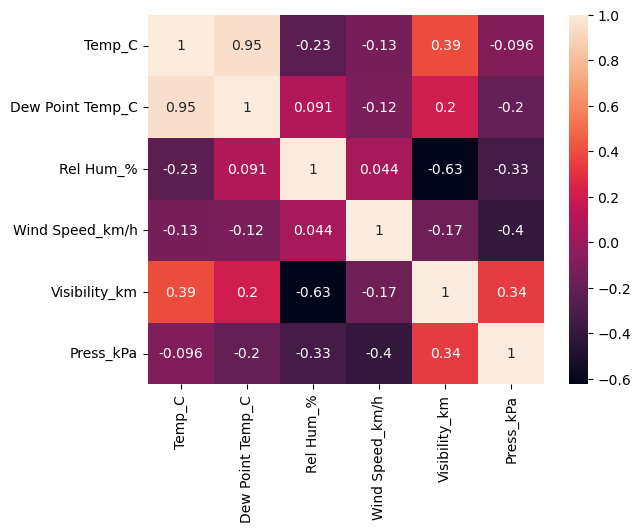

In [125]:
sns.heatmap(cor_matrix, annot = True)

In [127]:
weather_df.columns

Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'Std_Weather'],
      dtype='object')

<Axes: ylabel='Frequency'>

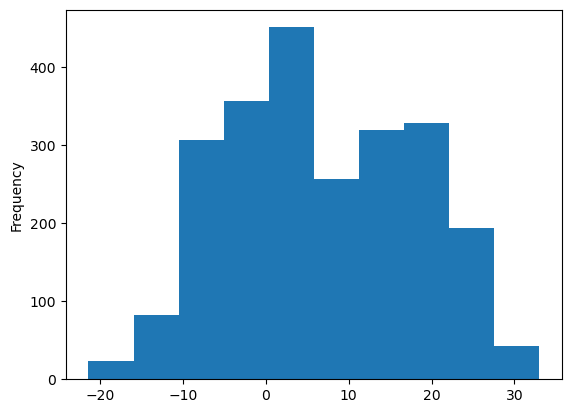

In [129]:
weather_df['Temp_C'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

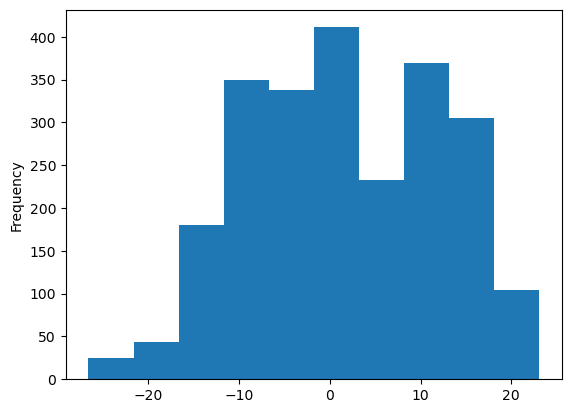

In [131]:
weather_df['Dew Point Temp_C'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

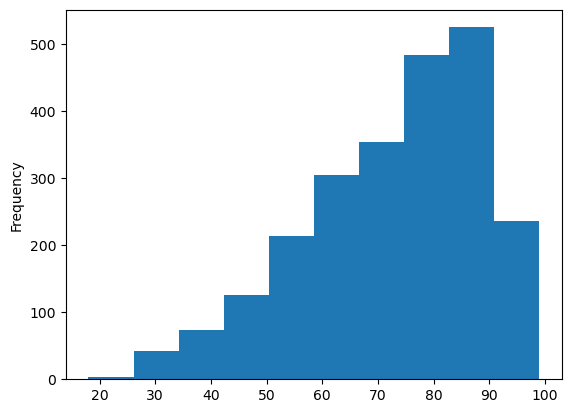

In [133]:
weather_df['Rel Hum_%'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

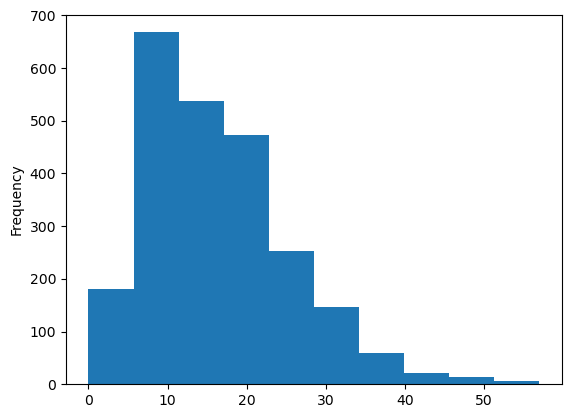

In [135]:
weather_df['Wind Speed_km/h'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

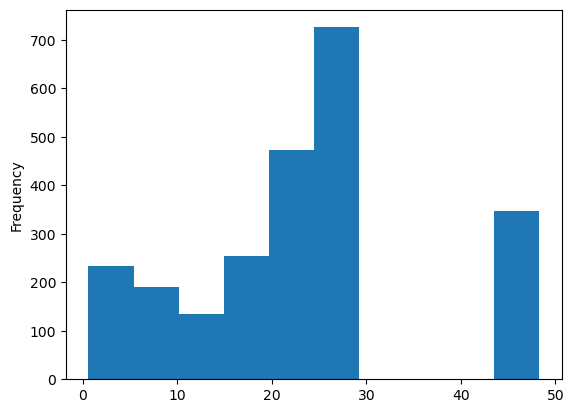

In [137]:
weather_df['Visibility_km'].plot(kind = 'hist')

<Axes: >

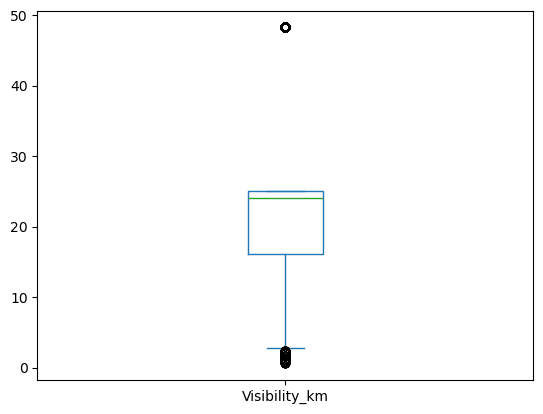

In [139]:
weather_df['Visibility_km'].plot(kind = 'box')

<Axes: >

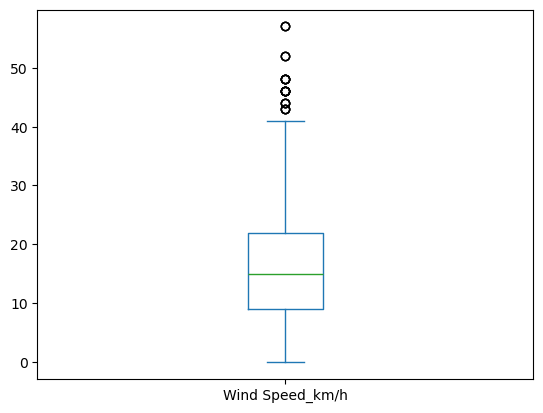

In [141]:
weather_df['Wind Speed_km/h'].plot(kind = 'box')

In [143]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
7967,-3.8,-6.5,81,7,25.0,102.07,CLOUDY
5033,26.2,10.6,38,17,48.3,101.10,CLOUDY
6610,15.2,13.3,88,9,24.1,101.09,CLOUDY
7241,12.7,6.3,65,26,25.0,101.01,CLOUDY
2821,2.7,-5.0,57,37,24.1,100.76,CLOUDY


### Label Encoding
    converting target variable into numeric

In [146]:
from sklearn.preprocessing import LabelEncoder as LE

In [148]:
le = LE()

In [152]:
weather_df['Std_Weather'] = le.fit_transform(weather_df['Std_Weather'])

In [154]:
le.classes_

array(['CLEAR', 'CLOUDY', 'RAIN', 'SNOW'], dtype=object)

In [156]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
7967,-3.8,-6.5,81,7,25.0,102.07,1
5033,26.2,10.6,38,17,48.3,101.10,1
6610,15.2,13.3,88,9,24.1,101.09,1
7241,12.7,6.3,65,26,25.0,101.01,1
2821,2.7,-5.0,57,37,24.1,100.76,1


In [158]:
weather_df.Std_Weather.value_counts()

Std_Weather
2    603
1    600
0    600
3    556
Name: count, dtype: int64

### Separating Dependent and Independent variables

In [161]:
X = weather_df.drop(['Std_Weather'], axis = 1)
X

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
7967,-3.8,-6.5,81,7,25.0,102.07
5033,26.2,10.6,38,17,48.3,101.10
6610,15.2,13.3,88,9,24.1,101.09
7241,12.7,6.3,65,26,25.0,101.01
2821,2.7,-5.0,57,37,24.1,100.76
...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13
8780,0.2,-2.4,83,24,9.7,100.03
8781,-0.5,-1.5,93,28,4.8,99.95
8782,-0.2,-1.8,89,28,9.7,99.91


In [165]:
y = weather_df['Std_Weather']
y

7967    1
5033    1
6610    1
7241    1
2821    1
       ..
8779    3
8780    3
8781    3
8782    3
8783    3
Name: Std_Weather, Length: 2359, dtype: int32

### Feature Scaling

In [168]:
from sklearn.preprocessing import StandardScaler as SS

In [170]:
scaler = SS()

In [172]:
X_std = scaler.fit_transform(X)
X_std

array([[-0.92001586, -0.77256338,  0.53625022, -1.00989905,  0.13773651,
         1.35938663],
       [ 1.73319473,  0.85552383, -2.21419795,  0.05913925,  1.96313211,
         0.30857578],
       [ 0.76035084,  1.11259023,  0.98399759, -0.79609139,  0.06722766,
         0.29774268],
       ...,
       [-0.6281627 , -0.29651449,  1.30381715,  1.23508139, -1.44479531,
        -0.9372309 ],
       [-0.60163059, -0.32507742,  1.0479615 ,  1.23508139, -1.06091383,
        -0.98056331],
       [-0.58394252, -0.35364036,  0.85606977,  1.44888905, -0.93556477,
        -1.00222951]])

### Splitting the dataset into Training and Testing Subsets

In [175]:
from sklearn.model_selection import train_test_split as tts

In [177]:
X_train, X_test, y_train, y_test = tts(X_std, y, test_size = 0.2, random_state = 42)

In [179]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1887, 6), (472, 6), (1887,), (472,))

### Model Building

In [228]:
from sklearn.tree import DecisionTreeClassifier as DTC
model = DTC(criterion = 'entropy', random_state = 42)

### Model Training

In [231]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

### Predictions

In [234]:
y_pred = model.predict(X_test)
y_pred

array([3, 0, 3, 2, 3, 3, 1, 3, 0, 3, 2, 0, 0, 1, 2, 3, 2, 0, 2, 3, 0, 0,
       0, 2, 2, 1, 0, 3, 1, 1, 3, 1, 0, 2, 2, 0, 0, 3, 3, 1, 2, 2, 2, 3,
       1, 2, 2, 3, 0, 2, 3, 1, 3, 2, 1, 3, 1, 2, 2, 0, 3, 0, 3, 0, 0, 2,
       1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 0, 3, 2, 1, 3, 3, 2, 0, 1, 2, 3, 1,
       0, 1, 3, 1, 2, 3, 2, 2, 0, 0, 3, 1, 1, 1, 3, 2, 3, 1, 1, 1, 3, 0,
       0, 2, 1, 3, 3, 0, 2, 0, 2, 2, 0, 2, 0, 3, 2, 0, 2, 2, 3, 3, 2, 0,
       2, 0, 0, 2, 3, 2, 1, 3, 1, 0, 1, 3, 1, 3, 3, 3, 0, 1, 3, 1, 1, 1,
       0, 3, 0, 1, 2, 3, 2, 1, 2, 0, 1, 2, 2, 0, 0, 2, 1, 0, 0, 2, 2, 2,
       1, 2, 2, 2, 0, 1, 2, 1, 1, 1, 2, 0, 0, 2, 1, 1, 3, 0, 1, 1, 3, 0,
       0, 3, 2, 2, 1, 1, 0, 2, 3, 0, 3, 3, 3, 1, 3, 0, 0, 0, 3, 3, 2, 2,
       3, 0, 2, 0, 3, 2, 1, 3, 2, 2, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 1, 3,
       2, 0, 0, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 2, 1, 0, 3, 3, 0, 1, 1, 1,
       1, 3, 0, 2, 3, 0, 2, 2, 0, 3, 1, 3, 3, 1, 3, 3, 0, 1, 2, 0, 3, 2,
       2, 1, 1, 0, 2, 2, 1, 2, 0, 3, 3, 0, 1, 1, 2,

### Model Evaluation

In [237]:
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm

### Accuracy

In [240]:
acc(y_test, y_pred)

0.6122881355932204

### Classification Report

In [243]:
print(cr(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.58      0.56       118
           1       0.46      0.43      0.44       128
           2       0.72      0.69      0.71       126
           3       0.72      0.79      0.76       100

    accuracy                           0.61       472
   macro avg       0.62      0.62      0.62       472
weighted avg       0.61      0.61      0.61       472



### Confusion Matrix

<Axes: >

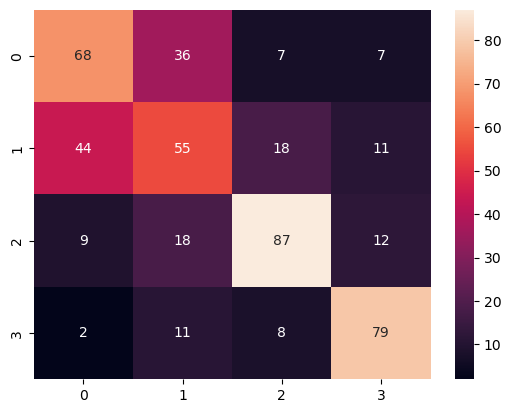

In [246]:
confusion = cm(y_test, y_pred)
sns.heatmap(confusion, annot = True, fmt = 'd')

### Building Multiple models: Best model

In [263]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR
from sklearn.naive_bayes import GaussianNB

In [277]:
dtc_model = DTC(criterion = 'entropy', random_state = 42)
rfc_model = RFC( n_estimators = 10, criterion = 'entropy')
svc_model = SVC()
knn_model = KNN()
lr_model = LR()
gnb_model = GaussianNB()

In [279]:
model_list = [dtc_model, rfc_model, svc_model, knn_model, lr_model, gnb_model]

In [281]:
from sklearn.metrics import accuracy_score

In [283]:
acc_list = []
for model1 in model_list:
    model1.fit(X_train, y_train)
    y_pred1 = model1.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_list.append(acc)



In [285]:
acc_list

[0.6122881355932204,
 0.6122881355932204,
 0.6122881355932204,
 0.6122881355932204,
 0.6122881355932204,
 0.6122881355932204]

In [288]:
model_df = pd.DataFrame({"Model" : model_list, "Accuracy" : acc_list})
model_df

,Model,Accuracy
0,"DecisionTreeClassifier(criterion='entropy', ra...",0.612288
1,"(DecisionTreeClassifier(criterion='entropy', m...",0.612288
2,SVC(),0.612288
3,KNeighborsClassifier(),0.612288
4,LogisticRegression(),0.612288
5,GaussianNB(),0.612288


### Saving the model

In [297]:
import joblib
joblib.dump(model, "Weather_Forecast_model.joblib")

['Weather_Forecast_model.joblib']

In [299]:
model = joblib.load("Weather_Forecast_model.joblib")

In [301]:
predictions = model.predict(X_test)
predictions

array([3, 1, 3, 2, 3, 3, 0, 3, 0, 3, 2, 0, 0, 2, 2, 3, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 0, 0, 3, 1, 1, 3, 1, 2, 2, 2, 0, 0, 3, 3, 2, 2, 2, 2, 3,
       1, 1, 2, 3, 0, 2, 1, 3, 3, 3, 0, 3, 1, 2, 2, 2, 3, 0, 3, 1, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 3, 2, 3, 1, 1, 3, 3, 2, 2, 2, 2, 3, 1,
       0, 2, 1, 0, 2, 3, 1, 2, 0, 3, 2, 2, 0, 1, 3, 2, 3, 1, 3, 3, 3, 0,
       2, 2, 2, 3, 3, 1, 3, 0, 3, 2, 0, 2, 0, 3, 2, 2, 3, 2, 3, 2, 2, 2,
       3, 0, 2, 2, 3, 3, 0, 3, 1, 2, 1, 3, 0, 3, 3, 3, 3, 3, 3, 2, 1, 3,
       0, 3, 0, 3, 2, 3, 3, 1, 2, 0, 1, 2, 2, 2, 1, 2, 1, 0, 2, 2, 3, 2,
       1, 2, 2, 3, 0, 2, 1, 0, 1, 0, 2, 0, 1, 2, 1, 1, 3, 2, 0, 0, 3, 1,
       1, 3, 2, 2, 2, 3, 0, 2, 3, 1, 3, 3, 3, 2, 3, 0, 2, 2, 3, 3, 3, 3,
       3, 0, 2, 0, 3, 2, 2, 3, 2, 2, 2, 0, 0, 0, 3, 2, 0, 2, 2, 2, 2, 3,
       3, 1, 2, 1, 3, 0, 2, 0, 1, 3, 1, 2, 2, 2, 0, 2, 3, 3, 0, 2, 3, 0,
       2, 2, 2, 2, 3, 0, 2, 2, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 2,
       2, 3, 2, 0, 1, 2, 2, 3, 0, 3, 3, 0, 0, 1, 2,